# Team Project

## Codebook Part1, Preprocessing and Identifying popular music Genre using KNN

#### Team_05  
Neha Reddy Yenugu  
Saketh Kallepalli  
Ashritha Gugire

#### As said this is our problem statement:
##### The problem being addressed is the need to analyze and understand the underlying connections between music genres, artists, and user sentiments.  we would like to “analyze the relationship between music genres, artists and user sentiment towards albums” 

Therefore in this notebook, Employing Natural Language Processing (NLP) techniques, we successfully identified prevalent themes 
and Genres associated with specific songs.we observed that musical genres are usually distinguished from each other in terms of their musical content.However, we are aware about the lyrical content that is often associated with specific genre.   
(Note: In our codebook we removed the correlation map because initially we found there is no correlation present between any genres of songs)  
In here for each code cell we have mentioned in comments for clear understandings.

## Note: We request to download neccassary packages and modules needed, because we have done installed few of them manually in Anaconda prompt


##### References of code:

[1] Dr.Lindi Liao Code examples and Videos in Blackboard: https://mymasonportal.gmu.edu/ultra/courses/_510861_1/cl/outline    
[2]Using Text Classifiers: https://medium.com/@oluwatobimesh/using-text-classifiers-to-predict-a-song-artist-33c6c30b6784 by Evelyn on Oct 24 2021(just referred)


In [51]:
## import dependencies
import numpy as np 
import pandas as pd
import os

import warnings
warnings.filterwarnings('ignore')

In [52]:
## Load the original datasets
df_artists = pd.read_csv("C:\\Users\\ashri\\Documents\\AIT-526\\musicgenre\\artists-data.csv")
df_lyrics = pd.read_csv("C:\\Users\\ashri\\Documents\\AIT-526\\musicgenre\\lyrics-data.csv")

In [53]:
##In our artist.csv, we have respective attributes [Artist, genres, no of songs performed, popularity, Link]. 
##This information was used to classify artist name and Genre assigned to them
df_artists.head()

Artist                  Genres  Songs  Popularity  \
0        Ivete Sangalo     Pop; Axé; Romântico  313.0         4.4   
1  Chiclete com Banana                     Axé  268.0         3.8   
2            Banda Eva  Axé; Romântico; Reggae  215.0         2.3   
3            É O Tchan                     Axé  129.0         1.6   
4       Claudia Leitte     Pop; Axé; Romântico  167.0         1.5   

                    Link  
0        /ivete-sangalo/  
1  /chiclete-com-banana/  
2            /banda-eva/  
3            /e-o-tchan/  
4       /claudia-leitte/

In [54]:
## In our lyric.csv we have respective attributes [Alink, Song name, Song Link, Lyric, Language] 
df_lyrics.head()

ALink                            SName  \
0  /ivete-sangalo/                            Arerê   
1  /ivete-sangalo/  Se Eu Não Te Amasse Tanto Assim   
2  /ivete-sangalo/                      Céu da Boca   
3  /ivete-sangalo/            Quando A Chuva Passar   
4  /ivete-sangalo/                     Sorte Grande   

                                               SLink  \
0                          /ivete-sangalo/arere.html   
1  /ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...   
2                     /ivete-sangalo/chupa-toda.html   
3          /ivete-sangalo/quando-a-chuva-passar.html   
4                   /ivete-sangalo/sorte-grande.html   

                                               Lyric language Unnamed: 5  
0  Tudo o que eu quero nessa vida,\nToda vida, é\...       pt        NaN  
1  Meu coração\nSem direção\nVoando só por voar\n...       pt        NaN  
2  É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...       pt        NaN  
3  Quando a chuva passar\n\nPra quê falar\nSe voc...       pt        NaN  
4  A minha sorte grande foi você cair do céu\nMin...       pt        NaN

In [55]:
df_lyrics.language.value_counts() 

language
en              191803
pt              157392
es                9917
rw                1679
it                1432
fr                1225
de                 844
fi                 145
sv                 112
ro                  97
no                  89
is                  86
tl                  69
pl                  47
gl                  36
ga                  32
tr                  32
id                  26
cy                  23
sw                  19
af                  19
su                  19
ko                  17
nl                  14
da                  13
ca                  13
et                  13
ms                   8
st                   7
ja                   7
ht                   5
eu                   4
ru                   4
gd                   4
ar                   4
mg                   3
ku                   3
cs                   3
ny                   3
hu                   2
jw                   2
lg                   2
 ON                  1
 D

In [56]:
## lets only use songs in english for this task and drop all other lannguages
df_lyrics = df_lyrics.drop(df_lyrics[df_lyrics['language'] !='en'].index)
df_lyrics.language.value_counts()

language
en    191803
Name: count, dtype: int64

After Loading these two datasets, started to data cleaning by dropping the columns that are not 
relevant to our task, such as duplicates in the ‘Slink’ column of the lyrics dataframe are dropped to 
ensure unique song entries

In [57]:
## Search for duplicate entries in 'SLink' (Artist & Song name):
df_lyrics.duplicated(subset = 'SLink', keep = 'first').value_counts()

False    191782
True         21
Name: count, dtype: int64

In [58]:
# Drop duplicates in the field 'SLink'
# that means above there are 21 same songs perfomred by same artist \.
df_lyrics.drop_duplicates(subset='SLink', keep='first', inplace=True, ignore_index=False)

In [59]:
# Search for persisting duplicate lyric entries:
df_lyrics.duplicated(subset = 'Lyric', keep = 'first').value_counts()

False    189382
True       2400
Name: count, dtype: int64

In [60]:
df_artists.drop(columns = ['Songs', 'Popularity'], inplace = True)
df_lyrics.drop(columns = ['Unnamed: 5', 'language','SLink'], inplace=True)

In [61]:
df_artists.rename(columns={'Link': 'artist_id'}, inplace = True)
df_lyrics.rename(columns={'SName': 'song_name', 'Lyric': 'song_lyric', 'ALink': 'artist_id'}, inplace = True)
df_artists.columns = df_artists.columns.str.lower()
df_lyrics.columns = df_lyrics.columns.str.lower()
df_artists.head()

artist                  genres              artist_id
0        Ivete Sangalo     Pop; Axé; Romântico        /ivete-sangalo/
1  Chiclete com Banana                     Axé  /chiclete-com-banana/
2            Banda Eva  Axé; Romântico; Reggae            /banda-eva/
3            É O Tchan                     Axé            /e-o-tchan/
4       Claudia Leitte     Pop; Axé; Romântico       /claudia-leitte/

Above, there are many Languages, therefore non- English are filtered out [only English count is 191803], 
columns in both dataframes are renamed and standardized, Null values are dropped out. 
• Duplicate song names and lyrics are identified and important once are investigated. 

In [62]:
# In here lets do some feature extraction,  based on the artist_id each genre is taken out respective to each artist to see who performed on which genre
df_artists.dropna(inplace=True)
df_lyrics.dropna(inplace= True)
def genres_list(column_values):
    column_values = column_values.split(";")
    column_values = [value.strip().lower() for value in column_values]
    return column_values

df_artists['genres'] = df_artists['genres'].apply(genres_list)

In [63]:
#top 15 most frequent themes
from sklearn.preprocessing import MultiLabelBinarizer
binarizer = MultiLabelBinarizer()
binarizer_model = binarizer.fit_transform(df_artists['genres'])
top_themes = pd.DataFrame(binarizer_model, columns=binarizer.classes_)
themes = pd.DataFrame(top_themes.sum()).sort_values(by=[0],ascending=False).head(15).index
df_artists = df_artists[['artist_id']].merge(top_themes[themes], left_index = True, right_index = True)
df_artists.head()

artist_id  rock  pop  romântico  gospel/religioso  pop/rock  \
0        /ivete-sangalo/     0    1          1                 0         0   
1  /chiclete-com-banana/     0    0          0                 0         0   
2            /banda-eva/     0    0          1                 0         0   
3            /e-o-tchan/     0    0          0                 0         0   
4       /claudia-leitte/     0    1          1                 0         0   

   hip hop  rap  sertanejo  indie  mpb  dance  trilha sonora  heavy metal  \
0        0    0          0      0    0      0              0            0   
1        0    0          0      0    0      0              0            0   
2        0    0          0      0    0      0              0            0   
3        0    0          0      0    0      0              0            0   
4        0    0          0      0    0      0              0            0   

   electronica  axé  
0            0    1  
1            0    1  
2            0    1  
3            0    1  
4            0    1

In [64]:
final_df = df_lyrics.merge(df_artists, how='inner', left_on = 'artist_id', right_on = 'artist_id')

In [65]:
final_df.head()

artist_id                                          song_name  \
0  /ivete-sangalo/                                   Careless Whisper   
1  /ivete-sangalo/  Could You Be Loved / Citação Musical do Rap: S...   
2  /ivete-sangalo/                             Cruisin' (Part. Saulo)   
3  /ivete-sangalo/                                               Easy   
4  /ivete-sangalo/                  For Your Babies (The Voice cover)   

                                          song_lyric  rock  pop  romântico  \
0  I feel so unsure\nAs I take your hand and lead...     0    1          1   
1  Don't let them fool, ya\nOr even try to school...     0    1          1   
2  Baby, let's cruise, away from here\nDon't be c...     0    1          1   
3  Know it sounds funny\nBut, I just can't stand ...     0    1          1   
4  You've got that look again\nThe one I hoped I ...     0    1          1   

   gospel/religioso  pop/rock  hip hop  rap  sertanejo  indie  mpb  dance  \
0                 0         0        0    0          0      0    0      0   
1                 0         0        0    0          0      0    0      0   
2                 0         0        0    0          0      0    0      0   
3                 0         0        0    0          0      0    0      0   
4                 0         0        0    0          0      0    0      0   

   trilha sonora  heavy metal  electronica  axé  
0              0            0            0    1  
1              0            0            0    1  
2              0            0            0    1  
3              0            0            0    1  
4              0            0            0    1

Above, both dataframes are combined based on artist_id and then each genre is taken out respective to 
each artist to see who performed on which genre

## Text cleaning(applying regex)

In [66]:
import re
from nltk import word_tokenize
from unidecode import unidecode
from string import punctuation

In [67]:
def text_cleaning(text):
    #lowercase
    text = text.lower()
    # punctuations:
    text = unidecode(text)
    # excluding html tags
    text = re.sub('<[^<]+?>', '', text)
    #removing numbers:
    text = ''.join(c for c in text if not c.isdigit())
    # remove urls
    text = re.sub('((www\.[^\s]+) | (https ?: //[^\s]+) | (http?: //[^\s]+))', '', text)
    text = ''.join(c for c in text if c not in punctuation)
    return word_tokenize(text)

In [68]:
from datetime import datetime
start_time = datetime.now()
final_df['music_lyric'] = final_df.apply(lambda row : text_cleaning(row['song_lyric']), axis = 1)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:04:43.240711


In [69]:
final_df[['artist_id','song_lyric','music_lyric']].head(2)

artist_id                                         song_lyric  \
0  /ivete-sangalo/  I feel so unsure\nAs I take your hand and lead...   
1  /ivete-sangalo/  Don't let them fool, ya\nOr even try to school...   

                                         music_lyric  
0  [i, feel, so, unsure, as, i, take, your, hand,...  
1  [dont, let, them, fool, ya, or, even, try, to,...

In [70]:
final_df.duplicated(subset = 'song_name', keep = 'first').value_counts()

False    137861
True      53441
Name: count, dtype: int64

In [71]:
# above we find that few duplicates song lyric, that is same song being performed by multiple artists
#IN here lets have a detailed overview
(final_df[final_df.duplicated(subset = 'song_lyric', keep = 'first')])

artist_id  \
615               /rihanna/   
1417      /michael-jackson/   
1742          /alicia-keys/   
1780          /alicia-keys/   
2115    /justin-timberlake/   
...                     ...   
191116               /kygo/   
191119               /kygo/   
191122               /kygo/   
191239             /matoma/   
191258             /khaled/   

                                                song_name  \
615                                   Stay (Solo Version)   
1417                     Gone Too Soon (Immortal Version)   
1742                Put It In A Love Song (feat. Beyoncé)   
1780                     Three Hour Drive - a Colors Show   
2115    Ain't Nothing Like The Real Thing (feat. Beyoncé)   
...                                                   ...   
191116            Born To Be Yours (with Imagine Dragons)   
191119                           Carry On (With Rita Ora)   
191122                      Cruise (Feat. Andrew Jackson)   
191239  I Don't Dance (Without You) (Feat. Enrique Igl...   
191258                                   Holla At Me Baby   

                                               song_lyric  rock  pop  \
615     All along it was a fever\nA cold sweat hot-hea...     0    1   
1417    Like a comet\nBlazing 'cross the evening sky\n...     0    1   
1742    [Alicia]\nHey yo B\n\n[Beyonce]\nWhat up A\n\n...     0    0   
1780    You give me\nYou give me life\nYou give me\n\n...     0    0   
2115    Ain't nothing like the real thing, baby\nAin't...     0    1   
...                                                   ...   ...  ...   
191116  I know I've given up\nA hundred times before\n...     0    0   
191119  You, to carry on for you, for you\n\nWalking a...     0    0   
191122  Sunset rolling, summer stolen\nWe'll never be ...     0    0   
191239  Yeah, oh yeah\nHey, girl, baby\n\nI like the w...     0    0   
191258  [Cool & Dre]\nThis is...This is\nThis is...AND...     0    0   

        romântico  gospel/religioso  pop/rock  hip hop  rap  sertanejo  indie  \
615             0                 0         0        0    0          0      0   
1417            0                 0         0        0    0          0      0   
1742            0                 0         0        0    0          0      0   
1780            0                 0         0        0    0          0      0   
2115            0                 0         0        1    0          0      0   
...           ...               ...       ...      ...  ...        ...    ...   
191116          0                 0         0        0    0          0      0   
191119          0                 0         0        0    0          0      0   
191122          0                 0         0        0    0          0      0   
191239          0                 0         0        0    0          0      0   
191258          0                 0         0        0    0          0      0   

        mpb  dance  trilha sonora  heavy metal  electronica  axé  \
615       0      0              0            0            0    0   
1417      0      0              0            0            0    0   
1742      0      0              0            0            0    0   
1780      0      0              0            0            0    0   
2115      0      1              0            0            0    0   
...     ...    ...            ...          ...          ...  ...   
191116    0      0              0            0            0    0   
191119    0      0              0            0            0    0   
191122    0      0              0            0            0    0   
191239    0      0              0            0            0    0   
191258    0      0              0            0            0    0   

                                              music_lyric  
615     [all, along, it, was, a, fever, a, cold, sweat...  
1417    [like, a, comet, blazing, cross, the, evening,...  
1742    [alicia, hey, yo, b, beyonce, what, up, a, ali...  
1780    [you, giv

In [72]:
final_df.duplicated(subset ='pop', keep = 'first').value_counts()

True     191300
False         2
Name: count, dtype: int64

##  Lemmatization and stop words


In [73]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")


def lemmatization(words):
    words = ' '.join(map(str,words))
    
    lemma = list()
    for word in nlp(words):
        lemma.append(word.lemma_)
        
    words = ' '.join(map(str, lemma))
    return(lemma)

In [74]:
# Removing the stopwords:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
stop_words = list(set(stopwords.words('portuguese') + list(STOP_WORDS)))

def remove_stop_words(words, stopwords):
      
    new_words = list()
    
    for word in words:
        if word not in stopwords:
            new_words.append(word)
            
    return_words = ' '.join(new_words)
    return return_words


In [75]:
start_time = datetime.now()

final_df['music_lyric'] = final_df.apply(lambda row : remove_stop_words(row['music_lyric'], stop_words), axis = 1)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:07:01.945270


In [76]:
final_df[['artist_id','song_lyric','music_lyric']].head(2)

artist_id                                         song_lyric  \
0  /ivete-sangalo/  I feel so unsure\nAs I take your hand and lead...   
1  /ivete-sangalo/  Don't let them fool, ya\nOr even try to school...   

                                         music_lyric  
0  i feel so unsure i take your hand and lead you...  
1  dont let them fool ya or even try to school ya...

In [77]:
#final_df.to_csv("C:\\Users\\ashri\\Documents\\AIT-526\\Final dataset\\music.csv")

Above, we focused on tokenization of lyrics by converting them to lowercase, 
removing accents, punctuation, digits, and URLs.  
Later, lemmatization for word reduction, vocabulary and abstraction of their meaning was done. 
Also, some words that are insignificant for textual analysis are removed.  
Finally, we stored our cleaned data in seperate file called music.csv

## Data Visualization

In [78]:
final_df['Number_of_words'] = final_df['music_lyric'].apply(lambda x:len(str(x).split()))
final_df.head()

artist_id                                          song_name  \
0  /ivete-sangalo/                                   Careless Whisper   
1  /ivete-sangalo/  Could You Be Loved / Citação Musical do Rap: S...   
2  /ivete-sangalo/                             Cruisin' (Part. Saulo)   
3  /ivete-sangalo/                                               Easy   
4  /ivete-sangalo/                  For Your Babies (The Voice cover)   

                                          song_lyric  rock  pop  romântico  \
0  I feel so unsure\nAs I take your hand and lead...     0    1          1   
1  Don't let them fool, ya\nOr even try to school...     0    1          1   
2  Baby, let's cruise, away from here\nDon't be c...     0    1          1   
3  Know it sounds funny\nBut, I just can't stand ...     0    1          1   
4  You've got that look again\nThe one I hoped I ...     0    1          1   

   gospel/religioso  pop/rock  hip hop  rap  sertanejo  indie  mpb  dance  \
0                 0         0        0    0          0      0    0      0   
1                 0         0        0    0          0      0    0      0   
2                 0         0        0    0          0      0    0      0   
3                 0         0        0    0          0      0    0      0   
4                 0         0        0    0          0      0    0      0   

   trilha sonora  heavy metal  electronica  axé  \
0              0            0            0    1   
1              0            0            0    1   
2              0            0            0    1   
3              0            0            0    1   
4              0            0            0    1   

                                         music_lyric  Number_of_words  
0  i feel so unsure i take your hand and lead you...              283  
1  dont let them fool ya or even try to school ya...              143  
2  baby lets cruise away from here dont be confus...              149  
3  know it sounds funny but i just cant stand the...              168  
4  youve got that look again the one i hoped i ha...              203

In [79]:
final_df['Number_of_words'].describe()

count    191302.000000
mean        235.387576
std         149.130260
min           1.000000
25%         139.000000
50%         199.000000
75%         286.000000
max        3189.000000
Name: Number_of_words, dtype: float64

Text(0.5, 1.0, 'Frequency distribution of number of words for each text extracted')

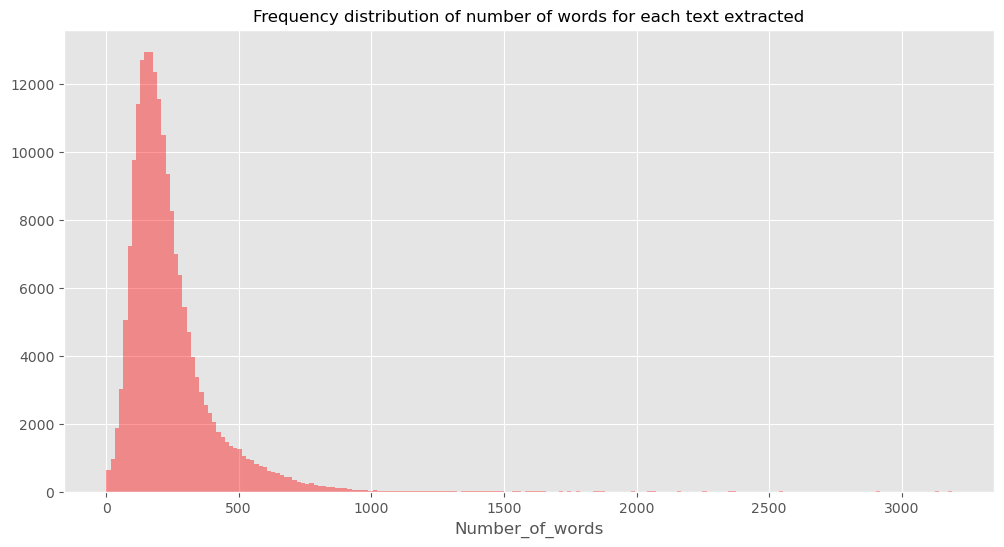

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
sns.distplot(final_df['Number_of_words'],kde = False,color="red",bins=200)
plt.title("Frequency distribution of number of words for each text extracted", size=12)

From the above histogram, the distribution is right-skewed, that means most of the songs have less words,as the frequency decreasing, the number of words increases

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [83]:
# TF-IDF

# Applying the model we can have a word frequency spare dataset that will be used to fill the algorithm.
tfidf = TfidfVectorizer(min_df=3,
                        max_df=0.9
                       )

df_sparse = tfidf.fit_transform(final_df['music_lyric'] + ' ' + final_df['artist_id'])

### KNN 

In [84]:
def get_recommended(vector, query_index, model):

    distances, indices = model.kneighbors(vector[query_index])
    result = []
    dists = []
    for i in range(0, len(distances.flatten())):
        index = indices.flatten()[i]
        if index == query_index:
            continue
        result.append(final_df.iloc[index])
        dists.append(distances.flatten()[i])
        
    result = pd.DataFrame(result)
    result['distances'] = dists
    return result

Generally, as we researched In the context of a music genre classification dataset with a 'lyric' column, the distances calculated likely represent the similarity or dissimilarity between the lyrics of different songs. 

The `get_recommended` function was designed to recommend songs based on their similarity to a given query song. When you pass a query vector (presumably representing the lyrics of a song) to the function, it calculates the distances between this query vector and all other vectors (i.e., the lyrics of all other songs) in the dataset. 
In the code above, the query song is represented by the `vector` and `query_index` parameters of the `get_recommended` function.

- The `vector` parameter likely represents a collection of numerical features or embeddings derived from the lyrics of songs in the dataset.
- The `query_index` parameter specifies the index of the song in the dataset that is being used as the query.

So, when you call the `get_recommended` function and pass a `vector` along with a `query_index`, we are essentially asking the function to find songs in the dataset that are similar to the song specified by the `query_index`. The function then calculates distances between the query song and all other songs in the dataset, and returns a DataFrame containing the recommended songs along with their distances from the query song.

So, in this context, the 'distances' calculated and stored in the DataFrame would represent how similar or dissimilar the lyrics of each recommended song are to the lyrics of the query song.

In [85]:
model_knn = NearestNeighbors(metric='cosine', n_neighbors=11)
model_knn.fit(csr_matrix(df_sparse))

NearestNeighbors(metric='cosine', n_neighbors=11)

In [86]:
aleatorio = np.random.choice(final_df.index)
auxiliar_df = final_df.iloc[aleatorio][['song_name', 'artist_id', 'song_lyric', 'music_lyric']]

print('Getting results for the "{}" music from the "{}" artist.'.format(auxiliar_df['song_name'], auxiliar_df['artist_id']))

result_df = get_recommended(df_sparse, aleatorio, model_knn)
result_df[['song_name', 'artist_id', 'song_lyric', 'distances']]

Getting results for the "Hit Me When U-1-2" music from the "/the-kills/" artist.


song_name          artist_id  \
112086                Oh (feat. Siobhan Malhotra)        /kate-nash/   
629                     This Is What You Came For          /rihanna/   
33350   This Is What You Came For (Feat. Rihanna)    /calvin-harris/   
142189                              My Number One         /paramore/   
189835                         And The Crowd Goes   /lemonade-mouth/   
188813                       Say That You're Here           /fragma/   
142020                      Meet Me In The Middle  /allstar-weekend/   
36830                               World Of Love             /inna/   
157331                                 First Time  /die-toten-hosen/   
30029               Yoü and I (Wild Beasts Remix)        /lady-gaga/   

                                               song_lyric  distances  
112086  I just can't stop thinking of you\nI really re...   0.179662  
629     Baby, this is what you came for\nLightning str...   0.187311  
33350   Baby, this is what you came for\nLightning str...   0.187840  
142189  You’re my number 1\nYou’re my golden star\nI l...   0.194640  
189835  Who's that tryin' to talk to me\nStandin' over...   0.203168  
188813  Oh oh oh.\nOh oh oh.\nOh oh oh oh oh oh oh...\...   0.203225  
142020  East Coast girl trying to catch the sun,\nCame...   0.207560  
36830   Only got my life, one time\nOne ticket, one st...   0.210439  
157331  One two three four!\n\nHello,\nthis is John Pl...   0.211863  
30029   (I, I, I, I, I)\nThis time, we, baby\nThis tim...   0.212613

In [87]:
result = result_df[result_df.index == result_df.index[0]]
print('Music name: {}\n'.format(result['song_name'].values[0]))
print('Artist name: {}\n'.format(result['artist_id'].values[0]))
print('Lyric overview: {}\n'.format(result['song_lyric'].values[0]))

Music name: Oh (feat. Siobhan Malhotra)

Artist name: /kate-nash/

Lyric overview: I just can't stop thinking of you
I really really can't think about you
I just can't think of you
Even though I want to

Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh

Don't tell me who to be
I don't care about reality
I'm livin', yeah, just for me
And not for what you might write
About my head and body

Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh

To leave behind is not to die
But we're all dying on our own
But we can die with love in our hearts
And theirs

Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh

I am angry, confused, frustrated
Tired, I am alone
On this one
Image concious
Image freak
The mirror lies to you and me
You are alone
On this one

Oh Oh Oh Oh Oh
Let it go
I don't know

And I've changed my mind
And I've changed my face
Yeah, I change all the time
So give me space

Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh
Oh Oh Oh Oh Oh

Where'd they go?
Yea

In [88]:
#comparing above one with the original search item..
print('Music name: {}\n'.format(auxiliar_df['song_name']))
print('Artist name: {}\n'.format(auxiliar_df['artist_id']))
print('Lyric overview: {}\n'.format(auxiliar_df['song_lyric']))

Music name: Hit Me When U-1-2

Artist name: /the-kills/

Lyric overview: Black screw, how you're gonna climb back
I’ll lift your finger, from another dead cat
Who’s blacked that liver, oh you think about that
Oh baby you better, not touch, no matter how bad

Oh oh oh, oh oh oh
I can help you now
Oh oh oh, oh oh oh
I can help you now

I knew that kid, won’t see the scene
Moving from one to the other, getting its sheep
Oh Clemont’s up, oh Clemont’s up
The way that we Laid the baby, the way it should be

Oh oh oh, oh oh oh
I can help you now
Oh oh oh, oh oh oh
I can help you now

Here it comes
Hit me when you one
And I did not
Hit me when you one
Two again she, hit
Hit me when you one
Two do it again she hit
Hit me when you one
Did she get you like that
Hit me when you one, two
Do you move it like that
Hit me when you one, two

Hit me when you one two...
Oh oh oh, oh oh oh....

I can help you now...
Oh oh oh, oh oh oh...



In [89]:
recommended_songs = dict()
most_frequent_theme = list()
for i in range(50):
    aleatorio = np.random.choice(final_df.index)
    result_df = get_recommended(df_sparse, aleatorio, model_knn)
    most_frequent_theme.append(result_df[themes].sum().sort_values(ascending=False).index[0])
    
    for song in result_df['song_name'].reset_index()['index']:
        if song in recommended_songs:
            recommended_songs[song] += 1
        else:
            recommended_songs[song] = 1

So in the above,we found out that there are similar osngs performed by the different artists and different groups.

In [90]:
sorted_tuple = sorted(recommended_songs.items(), key=lambda x:x[1], reverse=True)[:5]
i = 1
for item in sorted_tuple:
    print('The {} most recommended song was "{}" by {} times.'.format(i, final_df.iloc[item[0]]['song_name'], item[1]))
    i += 1


The 1 most recommended song was "Sun Goes Down" by 2 times.
The 2 most recommended song was "After Love (ft. Keri)" by 2 times.
The 3 most recommended song was "Fine" by 1 times.
The 4 most recommended song was "Into The Sun" by 1 times.
The 5 most recommended song was "Ain't Really Love" by 1 times.


In [91]:
print('The most frequent themes were:')
pd.DataFrame(most_frequent_theme).value_counts()[:5]

The most frequent themes were:


pop            21
rock           16
hip hop         3
romântico       3
heavy metal     2
Name: count, dtype: int64

###  Summary 
The system is designed to demonstrate how a KNN-based recommender can analyze and use the content (lyrics in this case) to find and suggest similar songs.  
-It highlights the utility of NLP in extracting meaningful patterns and relationships from text data, which in this case, helps in understanding user preferences and improving the relevance of music recommendations.  
-The iterative recommendation and theme analysis help to understand the consistency and bias of the recommendation system towards certain types of music or themes.   
-This type of system is beneficial for streaming platforms looking to enhance user experience by providing personalized song recommendations based on individual tastes and preferences extracted from song lyrics and user interaction data.
